# Machine Learning 2023-2024 - UMONS

## Perceptron

Remember the definition of the perceptron binary classifier:
$$
h(x) = \text{sign}(\boldsymbol{w}^T \boldsymbol{x})
$$
where $\boldsymbol{w}$ is the weight vector and $\boldsymbol{x}$ is the input vector.

The perceptron learning algorithm finds the weight vector $\boldsymbol{w}$ that separates the positive examples from the negative examples. The basic algorithm is as follows:
1. Initialize $\boldsymbol{w}$ randomly.
2. For each example $(\boldsymbol{x},y)$ in the training set:
    - If $y(\boldsymbol{w}^T \boldsymbol{x}) \leq 0$, update $\boldsymbol{w} = \boldsymbol{w} + y\boldsymbol{x}$.
    - Repeat until convergence.

It is guaranteed to converge if the data is linearly separable.

**The goal of this lab is to experiment with the perceptron learning algorithm using the functions `data_generator`, `plot_data`, `perceptron`, and `plot_results` that are defined below.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm

In [2]:
# Define a target function

def target_function(x, w):
    f = np.dot(w, x.T)
    return f

In [3]:
# Define a data generator

def data_generator(dimension, num_samples, seed=5):
    np.random.seed(seed)

    # randomly generate data from uniform distribution
    if dimension == 2:
        # if there are only 2 dimension add column names to plot the results
        data_x = pd.DataFrame(
            np.random.uniform(-100, 100, (num_samples, dimension)), columns=["x_1", "x_2"]
        )
    else:
        # if dimensions are greater than 2 then it is not possible to visualize
        data_x = pd.DataFrame(np.random.uniform(-100, 100, (num_samples, dimension)))
    data_x.insert(0, "x_0", np.ones(num_samples))

    # randomly select weights
    weights = np.random.uniform(-1, 1, (1, dimension + 1))

    # generate the data labels
    f = target_function(data_x, weights)
    data_y = np.sign(f)[0]

    # dataframe consisting of data and labels
    data_df = pd.concat([data_x, pd.DataFrame(data_y, columns=['y'])], axis=1)

    return data_df, data_x, data_y, weights

In [4]:
# Function to plot decision boundary

def plot_line(slope, intercept, label, color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + (slope * x_vals)
    plt.plot(x_vals, y_vals, label=label, c=color)
    plt.legend()

In [5]:
# Function to plot the data

def plot_data(data, weights):
    data_groups = data.groupby('y')
    for name, group in data_groups:
        plt.plot(group.x_1, group.x_2, marker='o', linestyle='', markersize=7, label=name)

    plt.legend()
    plot_line(-weights[0, 1] / weights[0, 2], -weights[0, 0] / weights[0, 2], label="f", color="red")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

In [6]:
# Perceptron function to train on the data

def perceptron(x, y, method="deterministic"):
    x_arr = np.array(x)
    y_arr = np.array(y)
    weight_arr = np.random.uniform(-1, 1, x_arr.shape[1])

    # find misclassified samples
    y_pred = np.sign(target_function(x_arr, weight_arr))

    n_iter = 0
    weights_hist = [weight_arr.copy()]
    while np.any(y_pred != y_arr):
        # get misclassified samples
        mis_ind = np.where(y_pred != y_arr)[0]

        if method == "deterministic":
            index = mis_ind[0]
        else:
            index = np.random.choice(mis_ind)

        x_mis = x_arr[index]
        y_mis = y_arr[index]

        # update weights
        weight_arr += y_mis * x_mis
        weights_hist.append(weight_arr.copy())
        # find misclassified samples
        y_pred = np.sign(target_function(x_arr, weight_arr))
        # update number of iterations
        n_iter += 1
    return weight_arr, n_iter, weights_hist

In [7]:
# Function to plot results

def plot_results(data, orig_weights, appr_weights, hist_weights, n_iter):
    data_groups = data.groupby('y')
    for name, group in data_groups:
        plt.plot(group.x_1, group.x_2, marker='o', linestyle='', markersize=7, label=name)
    plt.legend()

    color = iter(cm.rainbow(np.linspace(0, 1, 5)))
    plot_line(
        -orig_weights[0, 1] / orig_weights[0, 2],
        -orig_weights[0, 0] / orig_weights[0, 2],
        label="f",
        color=next(color),
    )
    plot_line(
        -appr_weights[1] / appr_weights[2],
        -appr_weights[0] / appr_weights[2],
        label="g",
        color=next(color),
    )
    for i in range(3):
        c = next(color)
        inc = int(len(hist_weights) / 3)
        idx = i * inc
        plot_line(
            -hist_weights[idx][1] / hist_weights[idx][2],
            -hist_weights[idx][0] / hist_weights[idx][2],
            label=f"It{idx}",
            color=c,
        )
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.title(f'Perceptron needs {n_iter} iterations to converge')
    plt.show()

**1) Generate a dataset of 20 points in 2 dimensions, and plot the results.**

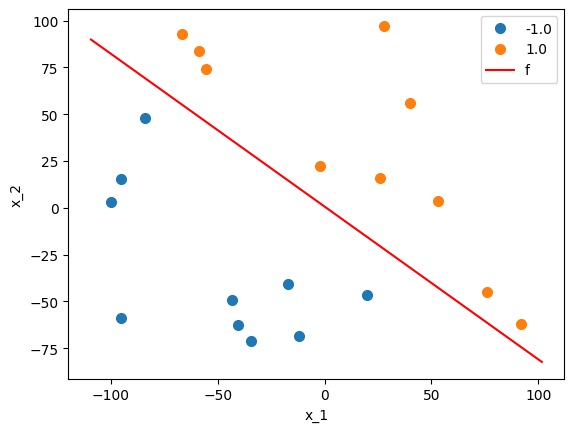

In [8]:
# Generate 20 data samples with 2 dimensions
data_df, data_x, data_y, weights_orig = data_generator(num_samples=20, dimension=2)

# Plot the generated data
plot_data(data_df, weights_orig)

**2) Run the perceptron learning algorithm on this dataset and plot the results.** 

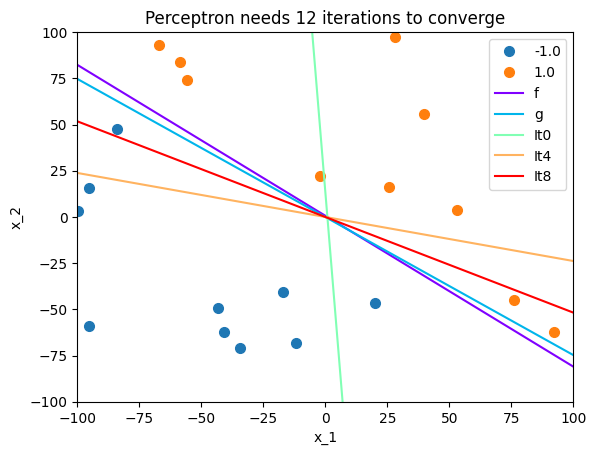

In [9]:
# Execute perceptron
approx_weights, num_iter, hist_weights = perceptron(data_x, data_y)

# Plot the results from perceptron
plot_results(data_df, weights_orig, approx_weights, hist_weights, num_iter)

**3) Generate a new dataset of 100 points in 2 dimensions, run the perceptron algorithm, and plot the results.**

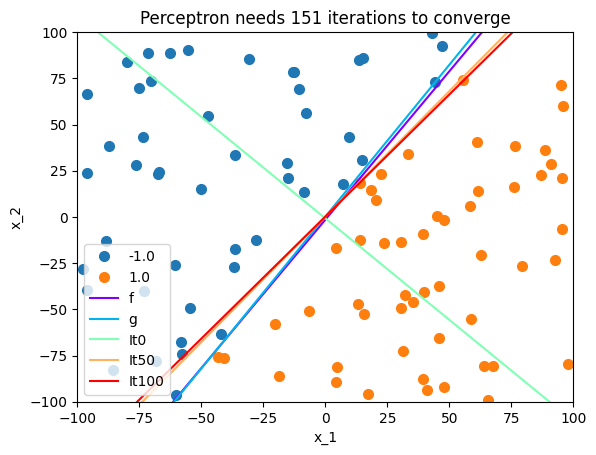

In [10]:
# Generate 100 data samples with 2 dimensions
data_df_2, data_x_2, data_y_2, weights_orig_2 = data_generator(
    num_samples=100, dimension=2, seed=0
)

# Execute perceptron
approx_weights_2, num_iter_2, hist_weights_2 = perceptron(data_x_2, data_y_2)

# Plot the results from perceptron
plot_results(data_df_2, weights_orig_2, approx_weights_2, hist_weights_2, num_iter_2)

**4) Generate a new dataset of 1000 points in 2 dimensions, run the perceptron algorithm, and plot the results.**

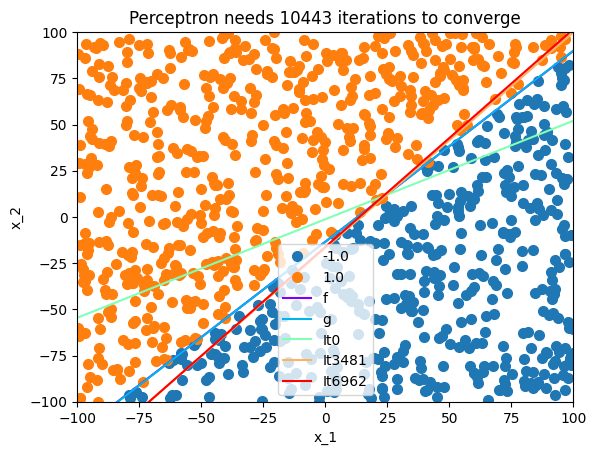

In [11]:
# Generate 1000 data samples with 2 dimensions
data_df_3, data_x_3, data_y_3, weights_orig_3 = data_generator(
    num_samples=1000, dimension=2, seed=0
)

# Execute perceptron
approx_weights_3, num_iter_3, hist_weights_3 = perceptron(data_x_3, data_y_3)

# Plot the results from perceptron
plot_results(data_df_3, weights_orig_3, approx_weights_3, hist_weights_3, num_iter_3)